In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)  

In [4]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [5]:
df_DA_US = df_DA_US.explode('job_skills')

In [6]:
df_DA_US['job_skills']

109        python
109             r
109       alteryx
109       tableau
180         excel
           ...   
784882        sql
784882        vba
784882    tableau
784882      excel
784882    alteryx
Name: job_skills, Length: 17440, dtype: object

In [10]:
df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median'])

In [23]:
df_DA_top_pay = df_DA_US_group.sort_values(by='median',ascending=False).head(10)

df_DA_skills = df_DA_US_group.sort_values(by='count',ascending=False).head(10).sort_values(by='median',ascending=False)



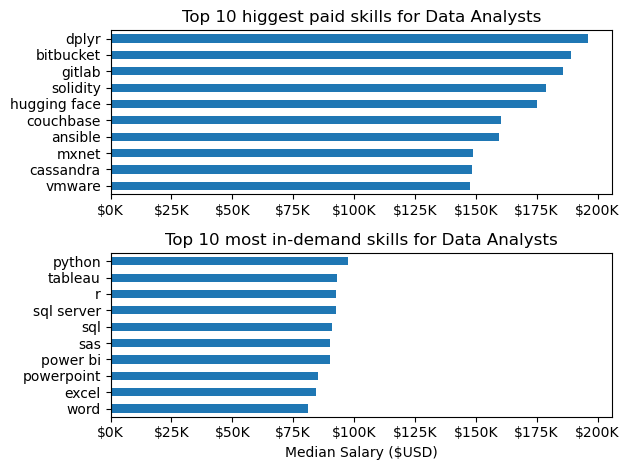

In [28]:
fig, ax = plt.subplots(2,1)

df_DA_top_pay[::-1].plot(kind='barh',y='median',ax=ax[0],legend=False)
ax[0].set_title('Top 10 higgest paid skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(lambda x,pos:f'${int(x/1000)}K')

df_DA_skills[::-1].plot(kind='barh',y='median',ax=ax[1],legend=False)
ax[1].set_title('Top 10 most in-demand skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(lambda x,pos:f'${int(x/1000)}K')

fig.tight_layout()